# Project For Data Science Term 2

## Profit and Waste Analysis of Repeating Menu Systems in a Filipino Eatery

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pylatex


# data = pd.read_excel("filipino_eatery_realistic_month.xlsx")
data=pd.read_excel("final_realism_upgraded_dataset.xlsx")
data

,Date,Day,Dish,Dish_Type,Cost_PHP,Price_PHP,Total_Serving,Sold,Unsold,Revenue,Profit
0,2025-01-06,Monday,Sinigang na Baboy,Soup,556,60,12,12,0,720,164
1,2025-01-06,Monday,Chicken Adobo,Chicken,619,60,13,10,3,600,-19
2,2025-01-06,Monday,Dinakdakan,Pork,969,80,14,13,1,1040,71
3,2025-01-06,Monday,Dinakdakan,Pork,865,80,12,11,1,880,15
4,2025-01-06,Monday,Paksiw na Bangus,Fish,336,60,15,15,0,900,564
...,...,...,...,...,...,...,...,...,...,...,...
175,2025-02-01,Saturday,Pork Adobo,Pork,558,60,13,12,1,720,162
176,2025-02-01,Saturday,Fried Salmon,Fish,291,50,14,12,2,600,309
177,2025-02-01,Saturday,Fried Salmon,Fish,303,50,15,14,1,700,397
178,2025-02-01,Saturday,Chopsuey,Vegetable,270,40,15,15,0,600,330


### Derived Metrics

In [2]:
# Create derived metrics
data['Waste_Rate'] = data['Unsold'] / data['Total_Serving']
data['Profit_Margin'] = data['Profit'] / data['Revenue']
data['Sell_Through_Rate'] = data['Sold'] / data['Total_Serving']

In [3]:
# aggregate by week
data['Date'] = pd.to_datetime(data['Date'])
data['Week'] = data['Date'].dt.isocalendar().week
data['Week'] = data['Week'] - data['Week'].min() + 1  # normalize to start at 1

weekly_summary = data.groupby('Week').agg(
    Cost_PHP=('Cost_PHP', 'sum'),
    Price_PHP=('Price_PHP', 'sum'),
    Total_Serving=('Total_Serving', 'sum'),
    Number_Sold=('Sold', 'sum'),
    Unsold_Quantity=('Unsold', 'sum'),
    Revenue=('Revenue', 'sum'),
    Profit=('Profit', 'sum'),
)

weekly_summary['Loss_PHP'] = (data['Price_PHP'] * data['Unsold']).groupby(data['Week']).sum()

weekly_summary

,Cost_PHP,Price_PHP,Total_Serving,Number_Sold,Unsold_Quantity,Revenue,Profit,Loss_PHP
Week,,,,,,,,
1,25534,2770,582,546,36,33730,8196,2120
2,27297,2820,601,563,38,34570,7273,2210
3,24042,2630,586,545,41,32620,8578,2430
4,26349,2740,593,555,38,33890,7541,2170


In [4]:
data.head()

,Date,Day,Dish,Dish_Type,Cost_PHP,Price_PHP,Total_Serving,Sold,Unsold,Revenue,Profit,Waste_Rate,Profit_Margin,Sell_Through_Rate,Week
0,2025-01-06,Monday,Sinigang na Baboy,Soup,556,60,12,12,0,720,164,0.000000,0.227778,1.000000,1
1,2025-01-06,Monday,Chicken Adobo,Chicken,619,60,13,10,3,600,-19,0.230769,-0.031667,0.769231,1
2,2025-01-06,Monday,Dinakdakan,Pork,969,80,14,13,1,1040,71,0.071429,0.068269,0.928571,1
3,2025-01-06,Monday,Dinakdakan,Pork,865,80,12,11,1,880,15,0.083333,0.017045,0.916667,1
4,2025-01-06,Monday,Paksiw na Bangus,Fish,336,60,15,15,0,900,564,0.000000,0.626667,1.000000,1


### Exploratory Data Analysis

In [5]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               180 non-null    datetime64[us]
 1   Day                180 non-null    str           
 2   Dish               180 non-null    str           
 3   Dish_Type          180 non-null    str           
 4   Cost_PHP           180 non-null    int64         
 5   Price_PHP          180 non-null    int64         
 6   Total_Serving      180 non-null    int64         
 7   Sold               180 non-null    int64         
 8   Unsold             180 non-null    int64         
 9   Revenue            180 non-null    int64         
 10  Profit             180 non-null    int64         
 11  Waste_Rate         180 non-null    float64       
 12  Profit_Margin      180 non-null    float64       
 13  Sell_Through_Rate  180 non-null    float64       
 14  Week               18

In [6]:
data.describe()

,Date,Cost_PHP,Price_PHP,Total_Serving,Sold,Unsold,Revenue,Profit,Waste_Rate,Profit_Margin,Sell_Through_Rate,Week
count,180,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.0
mean,2025-01-18 22:24:00,573.455556,60.888889,13.122222,12.272222,0.850000,748.944444,175.488889,0.064091,0.240107,0.935909,2.494444
min,2025-01-06 00:00:00,227.000000,40.000000,10.000000,9.000000,0.000000,400.000000,-247.000000,0.000000,-0.411667,0.750000,1.0
25%,2025-01-12 12:00:00,322.250000,60.000000,12.000000,11.000000,0.000000,600.000000,29.000000,0.000000,0.034226,0.904167,1.75
50%,2025-01-18 00:00:00,610.000000,60.000000,13.000000,12.000000,1.000000,720.000000,184.000000,0.066667,0.217917,0.933333,2.0
75%,2025-01-25 12:00:00,767.000000,70.000000,14.000000,14.000000,1.250000,850.000000,297.000000,0.095833,0.488542,1.000000,3.25
max,2025-02-01 00:00:00,1012.000000,80.000000,15.000000,15.000000,3.000000,1200.000000,627.000000,0.250000,0.696667,1.000000,4.0
std,NaN,233.560187,11.641233,1.388925,1.563660,0.948242,184.152891,178.955707,0.072163,0.253175,0.072163,1.121139


In [7]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               180 non-null    datetime64[us]
 1   Day                180 non-null    str           
 2   Dish               180 non-null    str           
 3   Dish_Type          180 non-null    str           
 4   Cost_PHP           180 non-null    int64         
 5   Price_PHP          180 non-null    int64         
 6   Total_Serving      180 non-null    int64         
 7   Sold               180 non-null    int64         
 8   Unsold             180 non-null    int64         
 9   Revenue            180 non-null    int64         
 10  Profit             180 non-null    int64         
 11  Waste_Rate         180 non-null    float64       
 12  Profit_Margin      180 non-null    float64       
 13  Sell_Through_Rate  180 non-null    float64       
 14  Week               18

In [8]:
data.groupby('Dish').agg(
    Cost_PHP=('Cost_PHP', 'sum'),
    Revenue=('Revenue', 'sum'),
    Profit=('Profit', 'sum'),
    Loss_PHP=('Price_PHP', lambda x: (x * data.loc[x.index, 'Unsold']).sum()),
    Waste_Rate=('Waste_Rate', 'mean'),
    Profit_Margin=('Profit_Margin', 'mean'),
    Sell_Through_Rate=('Sell_Through_Rate', 'mean')
).reset_index()

,Dish,Cost_PHP,Revenue,Profit,Loss_PHP,Waste_Rate,Profit_Margin,Sell_Through_Rate
0,Beef Steak,10160,13040,2880,400,0.029365,0.216245,0.970635
1,Chicken Adobo,2519,2400,-119,600,0.200321,-0.052172,0.799679
2,Chicken BBQ,1282,1150,-132,150,0.107143,-0.114545,0.892857
3,Chicken Curry,6498,6480,-18,960,0.132519,-0.029986,0.867481
4,Chopsuey,2251,4480,2229,280,0.058893,0.491883,0.941107
5,Dinakdakan,10326,11440,1114,320,0.028139,0.089863,0.971861
6,Fried Salmon,2944,6200,3256,500,0.076337,0.518489,0.923663
7,Fried Tilapia,1729,4560,2831,420,0.088217,0.611713,0.911783
8,Ginataang Kalabasa,1225,2680,1455,120,0.042051,0.540939,0.957949
9,Ginataang Pagi,3420,4440,1020,240,0.052503,0.218704,0.947497


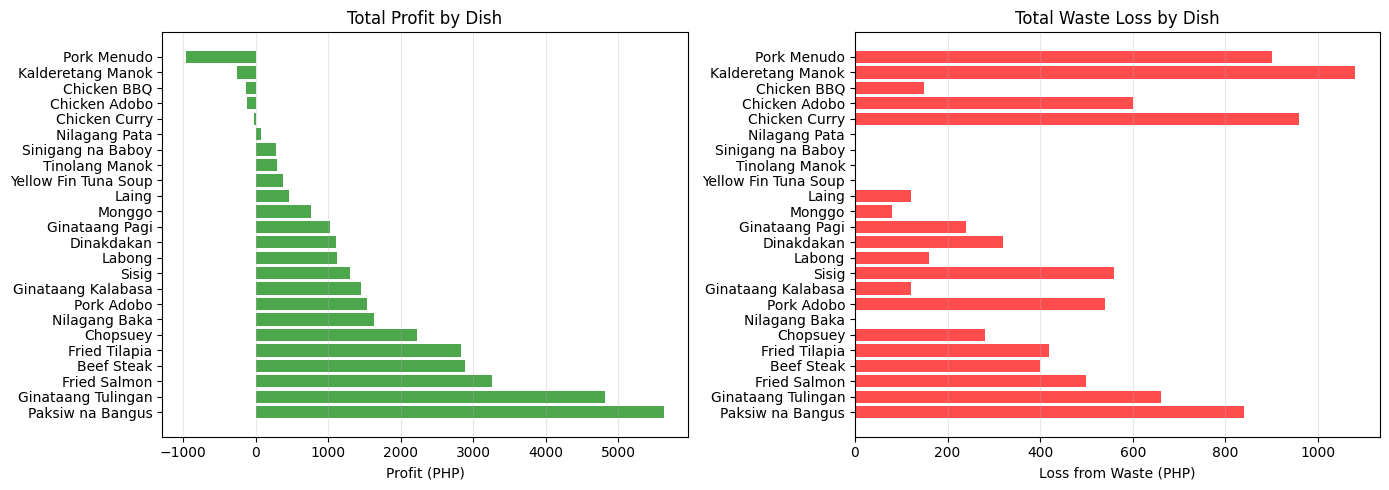

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

dish_summary = data.groupby('Dish').agg(
    Profit=('Profit', 'sum'),
    Loss_PHP=('Price_PHP', lambda x: (x * data.loc[x.index, 'Unsold']).sum())
).sort_values('Profit', ascending=False)

# Plot 1: Profit by Dish
axes[0].barh(dish_summary.index, dish_summary['Profit'], color='green', alpha=0.7)
axes[0].set_xlabel('Profit (PHP)')
axes[0].set_title('Total Profit by Dish')
axes[0].grid(axis='x', alpha=0.3)

# Plot 2: Waste (Loss) by Dish
axes[1].barh(dish_summary.index, dish_summary['Loss_PHP'], color='red', alpha=0.7)
axes[1].set_xlabel('Loss from Waste (PHP)')
axes[1].set_title('Total Waste Loss by Dish')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

In [10]:
data.groupby('Dish_Type').agg(
    Cost_PHP=('Cost_PHP', 'sum'),
    Revenue=('Revenue', 'sum'),
    Profit=('Profit', 'sum'),
    Loss_PHP=('Price_PHP', lambda x: (x * data.loc[x.index, 'Unsold']).sum()),
    Waste_Rate=('Waste_Rate', 'mean'),
    Profit_Margin=('Profit_Margin', 'mean'),
    Sell_Through_Rate=('Sell_Through_Rate', 'mean')
).reset_index()

,Dish_Type,Cost_PHP,Revenue,Profit,Loss_PHP,Waste_Rate,Profit_Margin,Sell_Through_Rate
0,Beef,10160,13040,2880,400,0.029365,0.216245,0.970635
1,Chicken,16550,16030,-520,2790,0.149168,-0.051121,0.850832
2,Fish,17099,34640,17541,2660,0.072707,0.498084,0.927293
3,Pork,38657,41660,3003,2320,0.055922,0.057715,0.944078
4,Soup,14746,17400,2654,0,0.000000,0.136955,1.000000
5,Vegetable,6010,12040,6030,760,0.059577,0.495252,0.940423


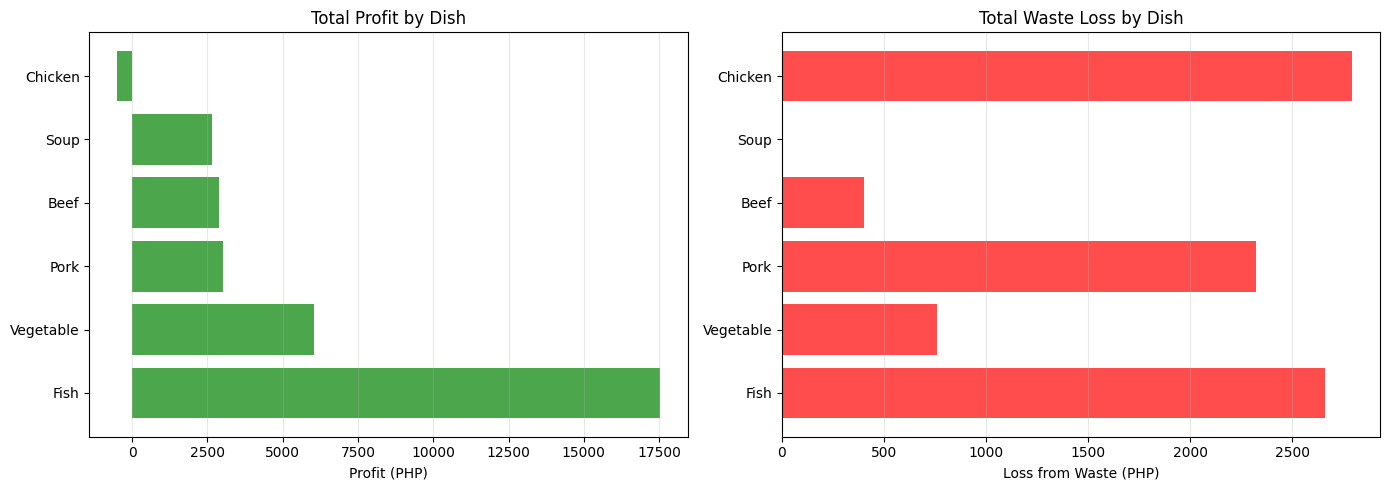

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

dish_summary = data.groupby('Dish_Type').agg(
    Profit=('Profit', 'sum'),
    Loss_PHP=('Price_PHP', lambda x: (x * data.loc[x.index, 'Unsold']).sum())
).sort_values('Profit', ascending=False)

# Plot 1: Profit by Dish
axes[0].barh(dish_summary.index, dish_summary['Profit'], color='green', alpha=0.7)
axes[0].set_xlabel('Profit (PHP)')
axes[0].set_title('Total Profit by Dish')
axes[0].grid(axis='x', alpha=0.3)

# Plot 2: Waste (Loss) by Dish
axes[1].barh(dish_summary.index, dish_summary['Loss_PHP'], color='red', alpha=0.7)
axes[1].set_xlabel('Loss from Waste (PHP)')
axes[1].set_title('Total Waste Loss by Dish')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

In [12]:
data.groupby('Week').agg(
    Cost_PHP=('Cost_PHP', 'sum'),
    Revenue=('Revenue', 'sum'),
    Profit=('Profit', 'sum'),
    Loss_PHP=('Price_PHP', lambda x: (x * data.loc[x.index, 'Unsold']).sum()),
    Waste_Rate=('Waste_Rate', 'mean'),
    Profit_Margin=('Profit_Margin', 'mean'),
    Sell_Through_Rate=('Sell_Through_Rate', 'mean')
).reset_index()

,Week,Cost_PHP,Revenue,Profit,Loss_PHP,Waste_Rate,Profit_Margin,Sell_Through_Rate
0,1,25534,33730,8196,2120,0.063077,0.246352,0.936923
1,2,27297,34570,7273,2210,0.060424,0.224773,0.939576
2,3,24042,32620,8578,2430,0.068419,0.268632,0.931581
3,4,26349,33890,7541,2170,0.064624,0.221647,0.935376


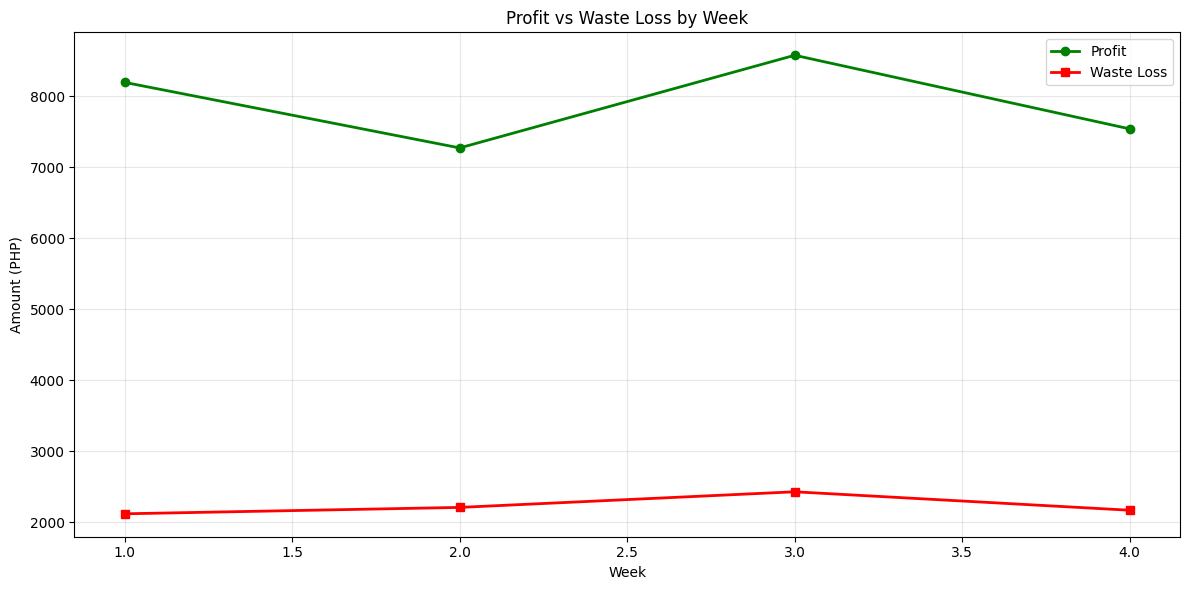

In [13]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(weekly_summary.index, weekly_summary['Profit'], marker='o', label='Profit', color='green', linewidth=2)
ax.plot(weekly_summary.index, weekly_summary['Loss_PHP'], marker='s', label='Waste Loss', color='red', linewidth=2)

ax.set_xlabel('Week')
ax.set_ylabel('Amount (PHP)')
ax.set_title('Profit vs Waste Loss by Week')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### Analysis

In [14]:
data.groupby("Dish_Type").agg(
    Profit=('Profit', 'mean'),
    Waste_Rate=('Waste_Rate', 'mean'),
    Sold=('Sold', 'mean'),
    Unsold=('Unsold', 'mean')
)


,Profit,Waste_Rate,Sold,Unsold
Dish_Type,,,,
Beef,240.000000,0.029365,13.583333,0.416667
Chicken,-21.666667,0.149168,11.291667,1.958333
Fish,365.437500,0.072707,12.458333,0.958333
Pork,62.562500,0.055922,12.750000,0.750000
Soup,110.583333,0.000000,11.000000,0.000000
Vegetable,251.250000,0.059577,12.541667,0.791667


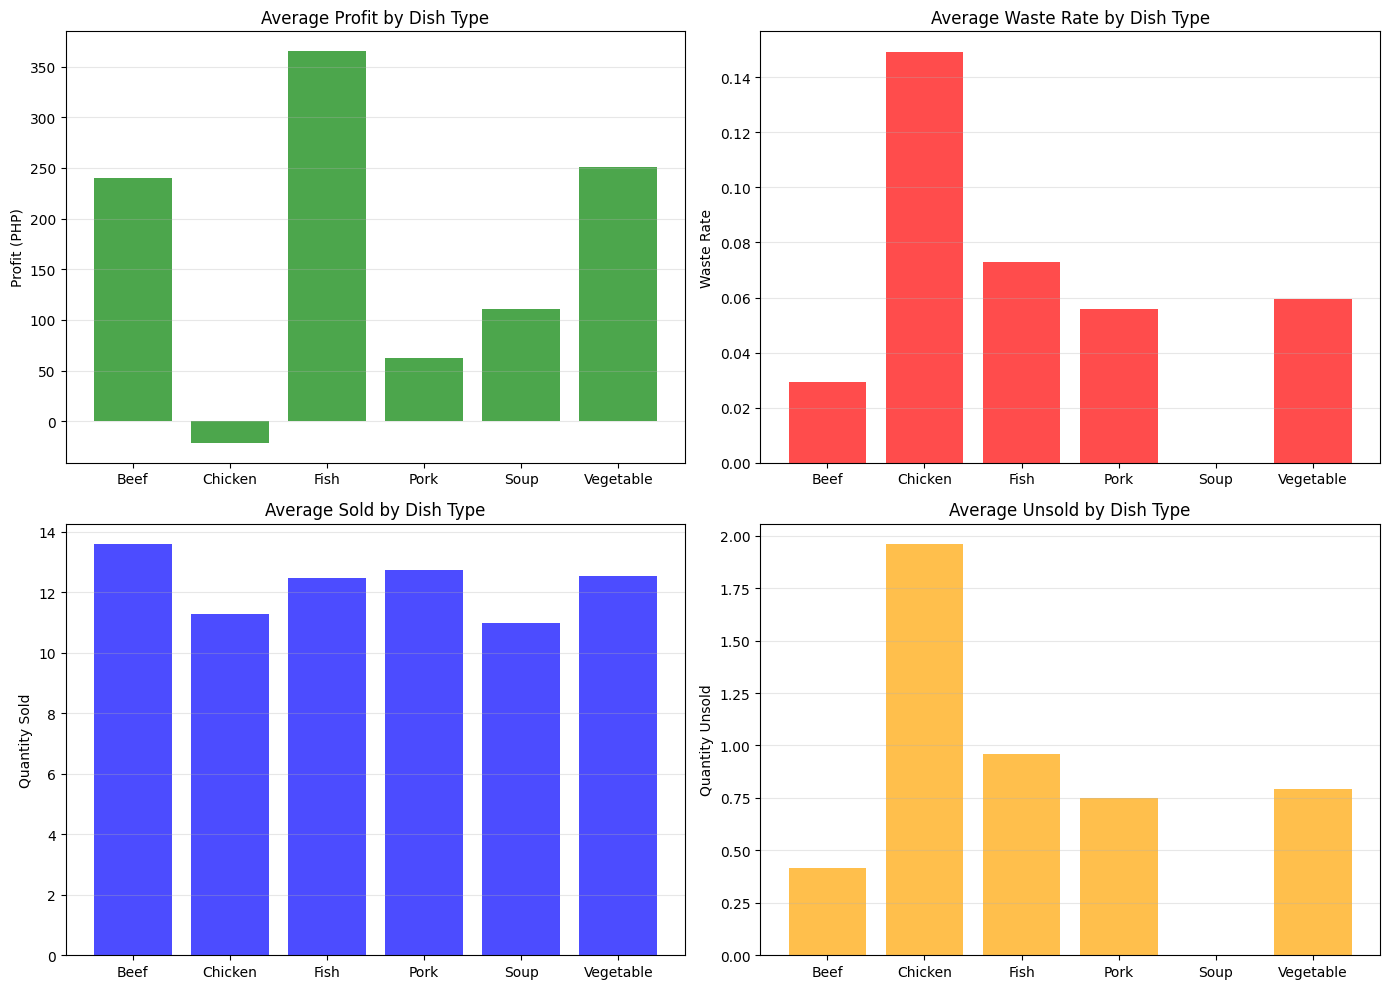

In [15]:
dish_type_summary = data.groupby("Dish_Type").agg(
    Profit=('Profit', 'mean'),
    Waste_Rate=('Waste_Rate', 'mean'),
    Sold=('Sold', 'mean'),
    Unsold=('Unsold', 'mean')
)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].bar(dish_type_summary.index, dish_type_summary['Profit'], color='green', alpha=0.7)
axes[0, 0].set_title('Average Profit by Dish Type')
axes[0, 0].set_ylabel('Profit (PHP)')
axes[0, 0].grid(axis='y', alpha=0.3)

axes[0, 1].bar(dish_type_summary.index, dish_type_summary['Waste_Rate'], color='red', alpha=0.7)
axes[0, 1].set_title('Average Waste Rate by Dish Type')
axes[0, 1].set_ylabel('Waste Rate')
axes[0, 1].grid(axis='y', alpha=0.3)

axes[1, 0].bar(dish_type_summary.index, dish_type_summary['Sold'], color='blue', alpha=0.7)
axes[1, 0].set_title('Average Sold by Dish Type')
axes[1, 0].set_ylabel('Quantity Sold')
axes[1, 0].grid(axis='y', alpha=0.3)

axes[1, 1].bar(dish_type_summary.index, dish_type_summary['Unsold'], color='orange', alpha=0.7)
axes[1, 1].set_title('Average Unsold by Dish Type')
axes[1, 1].set_ylabel('Quantity Unsold')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [16]:
data.groupby("Dish").agg(
    Profit=('Profit', 'mean'),
    Waste_Rate=('Waste_Rate', 'mean'),
    Sold=('Sold', 'mean'),
    Unsold=('Unsold', 'mean')
)


,Profit,Waste_Rate,Sold,Unsold
Dish,,,,
Beef Steak,240.000000,0.029365,13.583333,0.416667
Chicken Adobo,-29.750000,0.200321,10.000000,2.500000
Chicken BBQ,-66.000000,0.107143,11.500000,1.500000
Chicken Curry,-2.000000,0.132519,12.000000,1.777778
Chopsuey,247.666667,0.058893,12.444444,0.777778
Dinakdakan,101.272727,0.028139,13.000000,0.363636
Fried Salmon,325.600000,0.076337,12.400000,1.000000
Fried Tilapia,471.833333,0.088217,12.666667,1.166667
Ginataang Kalabasa,291.000000,0.042051,13.400000,0.600000


In [17]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               180 non-null    datetime64[us]
 1   Day                180 non-null    str           
 2   Dish               180 non-null    str           
 3   Dish_Type          180 non-null    str           
 4   Cost_PHP           180 non-null    int64         
 5   Price_PHP          180 non-null    int64         
 6   Total_Serving      180 non-null    int64         
 7   Sold               180 non-null    int64         
 8   Unsold             180 non-null    int64         
 9   Revenue            180 non-null    int64         
 10  Profit             180 non-null    int64         
 11  Waste_Rate         180 non-null    float64       
 12  Profit_Margin      180 non-null    float64       
 13  Sell_Through_Rate  180 non-null    float64       
 14  Week               18

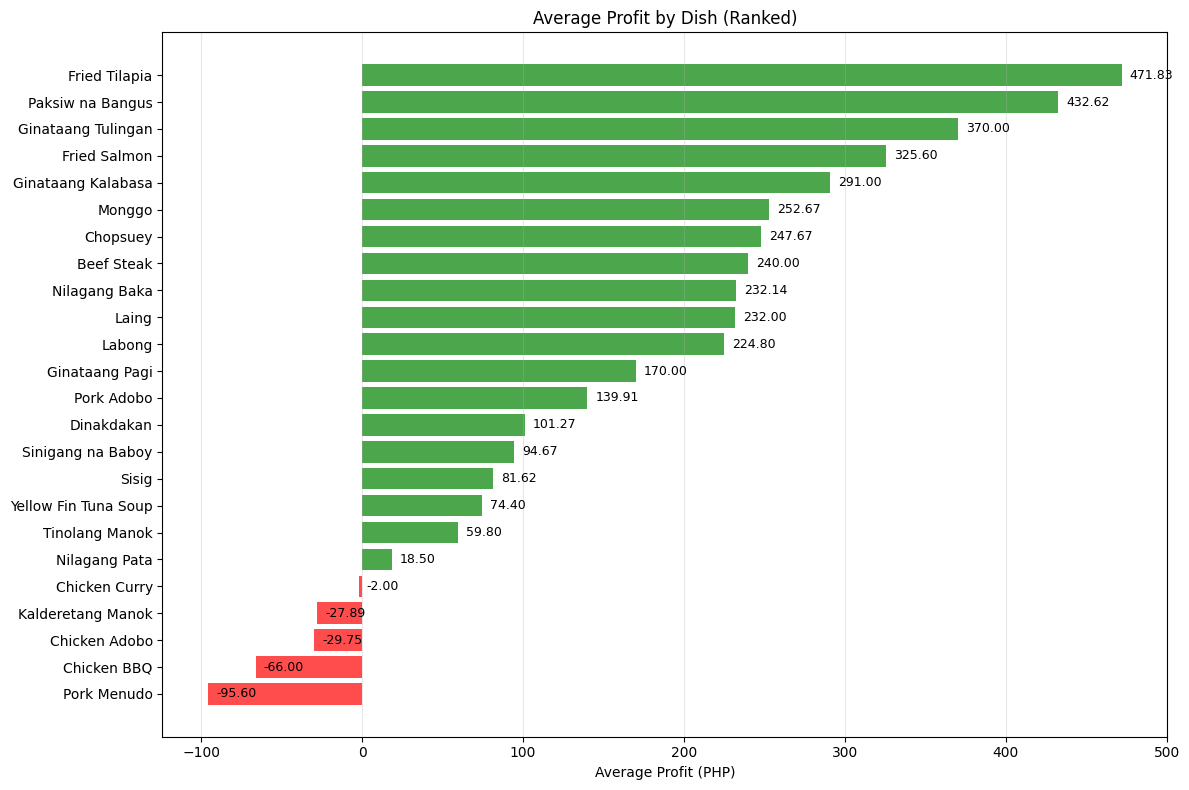

In [18]:
dish_profit = data.groupby("Dish")["Profit"].mean().sort_values()

fig, ax = plt.subplots(figsize=(12, 8))

ax.barh(dish_profit.index, dish_profit.values, color=['green' if x > 0 else 'red' for x in dish_profit.values], alpha=0.7)
ax.set_xlabel('Average Profit (PHP)')
ax.set_title('Average Profit by Dish (Ranked)')
ax.grid(axis='x', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(dish_profit.values):
    ax.text(v + 5, i, f'{v:.2f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

In [30]:
dish_profit

Dish
Pork Menudo             -95.600000
Chicken BBQ             -66.000000
Chicken Adobo           -29.750000
Kalderetang Manok       -27.888889
Chicken Curry            -2.000000
Nilagang Pata            18.500000
Tinolang Manok           59.800000
Yellow Fin Tuna Soup     74.400000
Sisig                    81.625000
Sinigang na Baboy        94.666667
Dinakdakan              101.272727
Pork Adobo              139.909091
Ginataang Pagi          170.000000
Labong                  224.800000
Laing                   232.000000
Nilagang Baka           232.142857
Beef Steak              240.000000
Chopsuey                247.666667
Monggo                  252.666667
Ginataang Kalabasa      291.000000
Fried Salmon            325.600000
Ginataang Tulingan      370.000000
Paksiw na Bangus        432.615385
Fried Tilapia           471.833333
Name: Profit, dtype: float64

C:\Users\Vernon\AppData\Local\Temp\ipykernel_8464\3448286589.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([unsold_by_dish[dish] for dish in unsold_by_dish.index], labels=unsold_by_dish.index, vert=False)


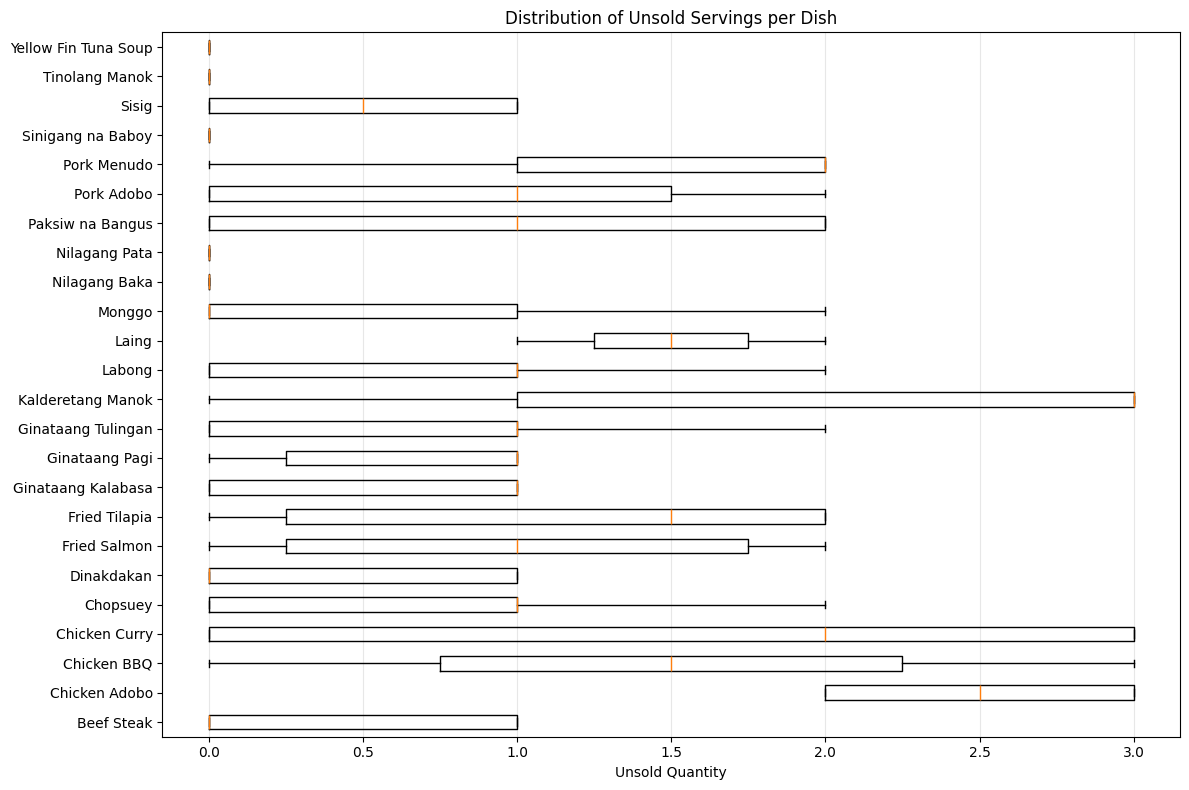

In [19]:
fig, ax = plt.subplots(figsize=(12, 8))

unsold_by_dish = data.groupby('Dish')['Unsold'].apply(list)

ax.boxplot([unsold_by_dish[dish] for dish in unsold_by_dish.index], labels=unsold_by_dish.index, vert=False)
ax.set_xlabel('Unsold Quantity')
ax.set_title('Distribution of Unsold Servings per Dish')
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

In [31]:
unsold_by_dish

Dish
Beef Steak                          [1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0]
Chicken Adobo                                               [3, 2, 2, 3]
Chicken BBQ                                                       [3, 0]
Chicken Curry                                [2, 3, 3, 0, 0, 3, 2, 0, 3]
Chopsuey                                     [1, 1, 1, 0, 0, 2, 2, 0, 0]
Dinakdakan                             [1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0]
Fried Salmon                              [1, 0, 2, 1, 0, 2, 0, 1, 2, 1]
Fried Tilapia                                         [0, 0, 2, 2, 2, 1]
Ginataang Kalabasa                                       [1, 1, 0, 1, 0]
Ginataang Pagi                                        [0, 1, 1, 1, 0, 1]
Ginataang Tulingan               [2, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 2]
Kalderetang Manok                            [3, 3, 1, 3, 3, 1, 0, 1, 3]
Labong                                                   [0, 0, 1, 2, 1]
Laing                                         

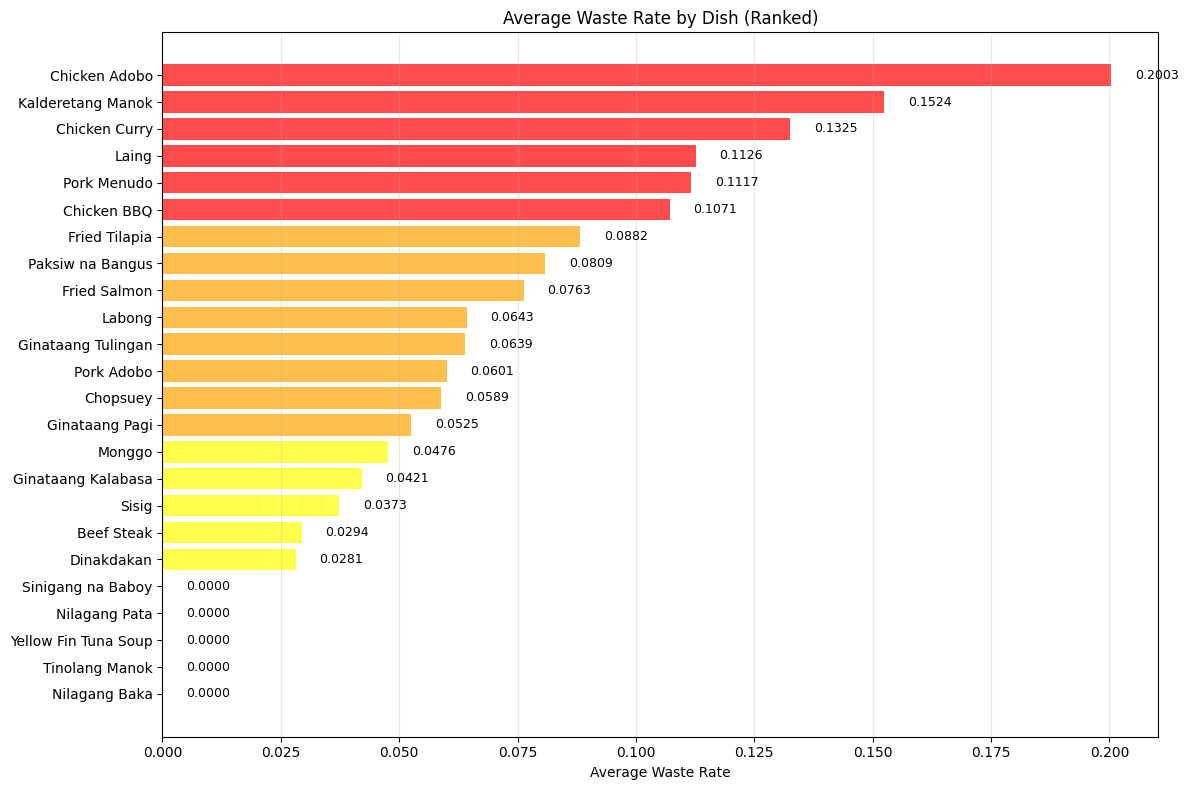

In [20]:
dish_waste = data.groupby("Dish")["Waste_Rate"].mean().sort_values()

fig, ax = plt.subplots(figsize=(12, 8))

ax.barh(dish_waste.index, dish_waste.values, color=['red' if x > 0.10 else 'orange' if x > 0.05 else 'yellow' for x in dish_waste.values], alpha=0.7)
ax.set_xlabel('Average Waste Rate')
ax.set_title('Average Waste Rate by Dish (Ranked)')
ax.grid(axis='x', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(dish_waste.values):
    ax.text(v + 0.005, i, f'{v:.4f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

In [32]:
dish_waste

Dish
Nilagang Baka           0.000000
Tinolang Manok          0.000000
Yellow Fin Tuna Soup    0.000000
Nilagang Pata           0.000000
Sinigang na Baboy       0.000000
Dinakdakan              0.028139
Beef Steak              0.029365
Sisig                   0.037294
Ginataang Kalabasa      0.042051
Monggo                  0.047619
Ginataang Pagi          0.052503
Chopsuey                0.058893
Pork Adobo              0.060073
Ginataang Tulingan      0.063919
Labong                  0.064286
Fried Salmon            0.076337
Paksiw na Bangus        0.080868
Fried Tilapia           0.088217
Chicken BBQ             0.107143
Pork Menudo             0.111722
Laing                   0.112637
Chicken Curry           0.132519
Kalderetang Manok       0.152422
Chicken Adobo           0.200321
Name: Waste_Rate, dtype: float64

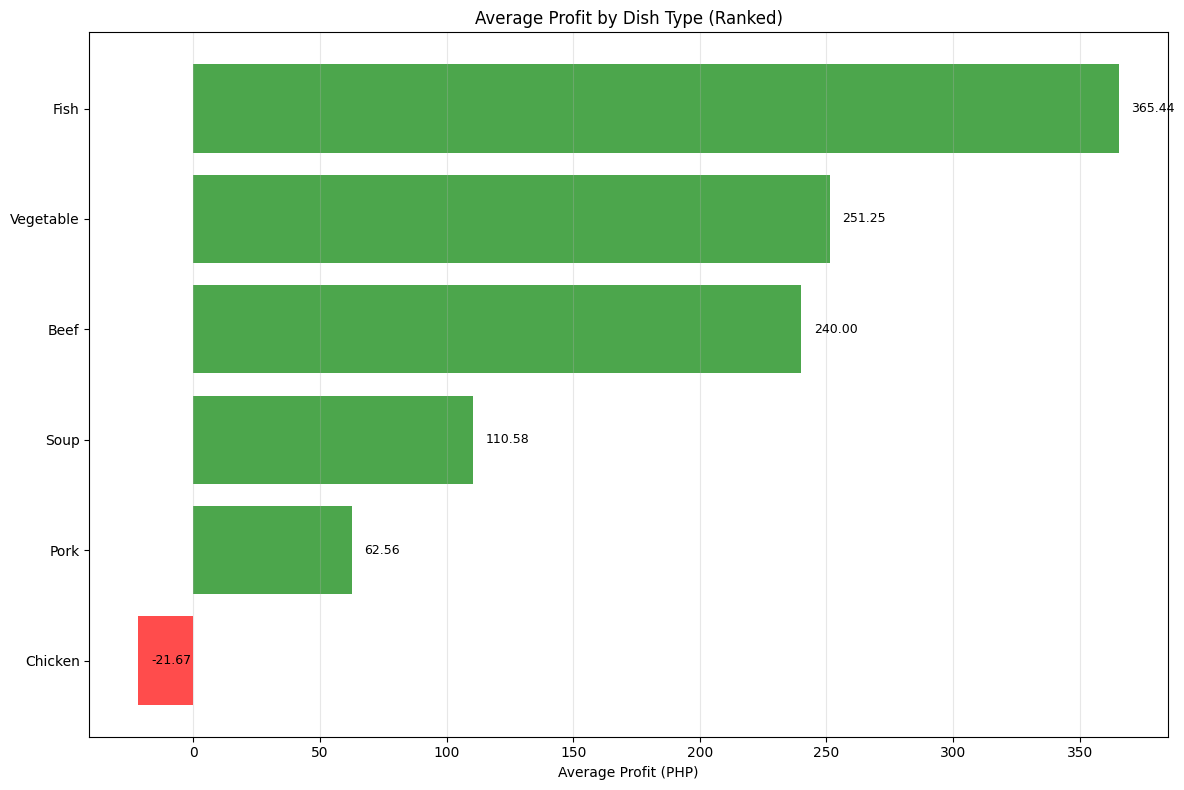

In [21]:
dish_type_profit = data.groupby("Dish_Type")["Profit"].mean().sort_values()

fig, ax = plt.subplots(figsize=(12, 8))

ax.barh(dish_type_profit.index, dish_type_profit.values, color=['green' if x > 0 else 'red' for x in dish_type_profit.values], alpha=0.7)
ax.set_xlabel('Average Profit (PHP)')
ax.set_title('Average Profit by Dish Type (Ranked)')
ax.grid(axis='x', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(dish_type_profit.values):
    ax.text(v + 5, i, f'{v:.2f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()






In [33]:
dish_type_profit

Dish_Type
Chicken      -21.666667
Pork          62.562500
Soup         110.583333
Beef         240.000000
Vegetable    251.250000
Fish         365.437500
Name: Profit, dtype: float64

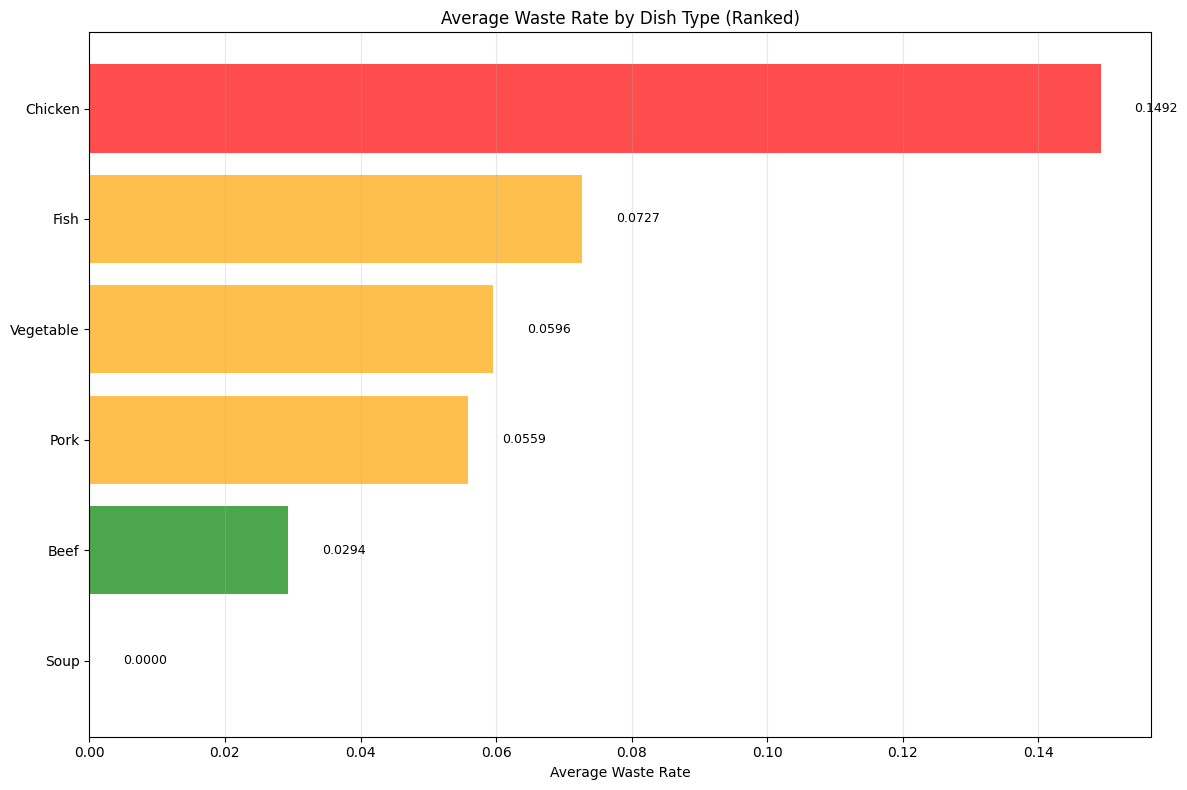

In [22]:
dish_type_waste = data.groupby("Dish_Type")["Waste_Rate"].mean().sort_values()

fig, ax = plt.subplots(figsize=(12, 8))

ax.barh(dish_type_waste.index, dish_type_waste.values, color=['green' if x < 0.05 else 'orange' if x < 0.10 else 'red' for x in dish_type_waste.values], alpha=0.7)
ax.set_xlabel('Average Waste Rate')
ax.set_title('Average Waste Rate by Dish Type (Ranked)')
ax.grid(axis='x', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(dish_type_waste.values):
    ax.text(v + 0.005, i, f'{v:.4f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

In [34]:
dish_type_waste

Dish_Type
Soup         0.000000
Beef         0.029365
Pork         0.055922
Vegetable    0.059577
Fish         0.072707
Chicken      0.149168
Name: Waste_Rate, dtype: float64

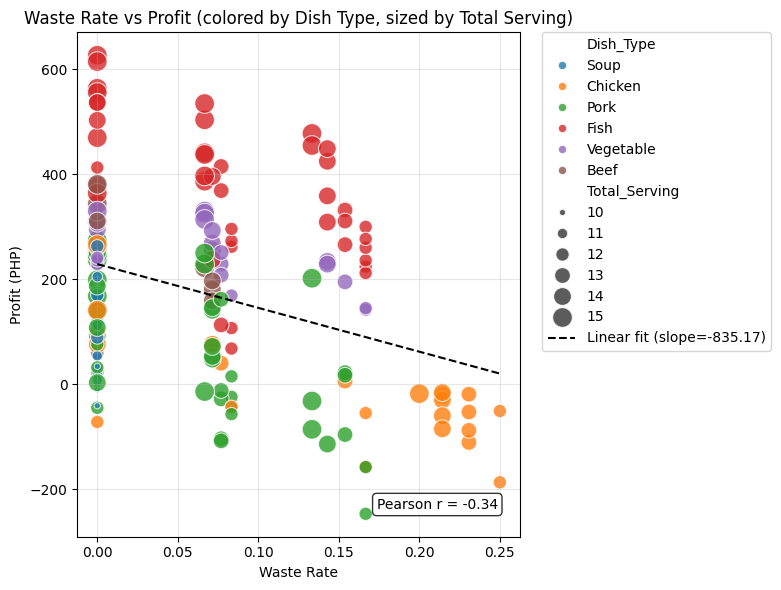

In [29]:
import seaborn as sns

# Scatter of Waste_Rate vs Profit with linear fit and Pearson r
mask = data[['Waste_Rate', 'Profit', 'Dish_Type', 'Total_Serving']].dropna()
r = mask['Waste_Rate'].corr(mask['Profit'])

fig_scatter, ax_scatter = plt.subplots(figsize=(8, 6))
sns.scatterplot(
    data=mask,
    x='Waste_Rate',
    y='Profit',
    hue='Dish_Type',
    size='Total_Serving',
    palette='tab10',
    alpha=0.8,
    ax=ax_scatter,
    sizes=(20, 200),
    legend='brief'
)

# linear fit (only if enough points)
if len(mask) > 1:
    z = np.polyfit(mask['Waste_Rate'], mask['Profit'], 1)
    p = np.poly1d(z)
    xs = np.linspace(mask['Waste_Rate'].min(), mask['Waste_Rate'].max(), 100)
    ax_scatter.plot(xs, p(xs), color='black', linestyle='--', linewidth=1.5, label=f'Linear fit (slope={z[0]:.2f})')

# annotate correlation
ax_scatter.text(0.95, 0.05, f'Pearson r = {r:.2f}', transform=ax_scatter.transAxes,
                ha='right', va='bottom', bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.8))

ax_scatter.set_xlabel('Waste Rate')
ax_scatter.set_ylabel('Profit (PHP)')
ax_scatter.set_title('Waste Rate vs Profit (colored by Dish Type, sized by Total Serving)')
ax_scatter.grid(True, alpha=0.3)
ax_scatter.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()


plt.show()

In [ ]:
# display values used in the Profit vs Waste Loss by Week plot
vals = weekly_summary[['Profit', 'Loss_PHP']]
vals
print("Weeks:", vals.index.tolist())
print("Profit:", vals['Profit'].tolist())
print("Loss_PHP:", vals['Loss_PHP'].tolist())

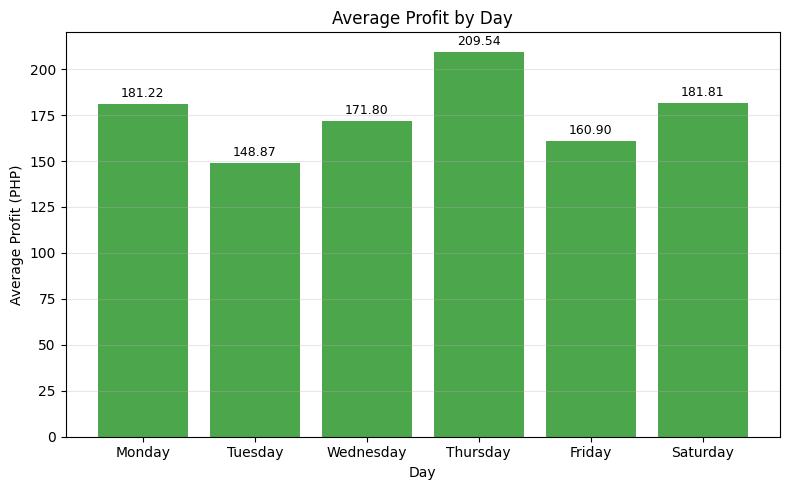

In [23]:
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
avg_profit_by_day = data.groupby("Day")["Profit"].mean().reindex(day_order).dropna()

fig_day, ax_day = plt.subplots(figsize=(8, 5))
ax_day.bar(avg_profit_by_day.index, avg_profit_by_day.values, color='green', alpha=0.7)
ax_day.set_xlabel('Day')
ax_day.set_ylabel('Average Profit (PHP)')
ax_day.set_title('Average Profit by Day')
ax_day.grid(axis='y', alpha=0.3)

for i, v in enumerate(avg_profit_by_day.values):
    ax_day.text(i, v + (max(avg_profit_by_day.values) * 0.01), f'{v:.2f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


In [24]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               180 non-null    datetime64[us]
 1   Day                180 non-null    str           
 2   Dish               180 non-null    str           
 3   Dish_Type          180 non-null    str           
 4   Cost_PHP           180 non-null    int64         
 5   Price_PHP          180 non-null    int64         
 6   Total_Serving      180 non-null    int64         
 7   Sold               180 non-null    int64         
 8   Unsold             180 non-null    int64         
 9   Revenue            180 non-null    int64         
 10  Profit             180 non-null    int64         
 11  Waste_Rate         180 non-null    float64       
 12  Profit_Margin      180 non-null    float64       
 13  Sell_Through_Rate  180 non-null    float64       
 14  Week               18

In [25]:
# Drop non-numeric columns and convert remaining object columns to numeric
data_numeric = data.drop(columns=['Date', 'Day', 'Week'])

# Convert any remaining object columns to numeric using categorical encoding
for col in data_numeric.select_dtypes(include=['object']).columns:
    data_numeric[col] = pd.Categorical(data_numeric[col]).codes

data_numeric

C:\Users\Vernon\AppData\Local\Temp\ipykernel_8464\2444971342.py:5: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  for col in data_numeric.select_dtypes(include=['object']).columns:


,Dish,Dish_Type,Cost_PHP,Price_PHP,Total_Serving,Sold,Unsold,Revenue,Profit,Waste_Rate,Profit_Margin,Sell_Through_Rate
0,20,4,556,60,12,12,0,720,164,0.000000,0.227778,1.000000
1,1,1,619,60,13,10,3,600,-19,0.230769,-0.031667,0.769231
2,5,3,969,80,14,13,1,1040,71,0.071429,0.068269,0.928571
3,5,3,865,80,12,11,1,880,15,0.083333,0.017045,0.916667
4,17,2,336,60,15,15,0,900,564,0.000000,0.626667,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
175,18,3,558,60,13,12,1,720,162,0.076923,0.225000,0.923077
176,6,2,291,50,14,12,2,600,309,0.142857,0.515000,0.857143
177,6,2,303,50,15,14,1,700,397,0.066667,0.567143,0.933333
178,4,5,270,40,15,15,0,600,330,0.000000,0.550000,1.000000


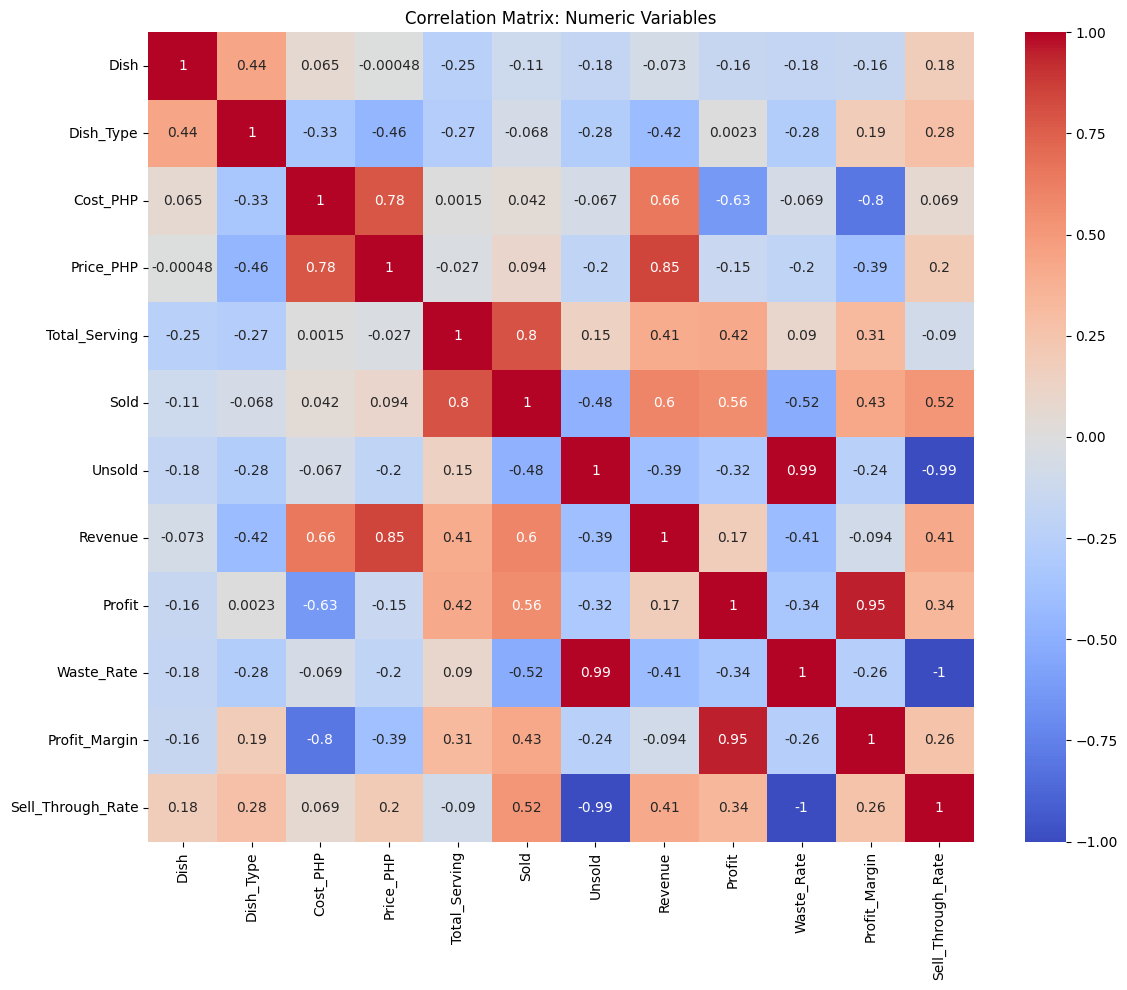

In [26]:
import seaborn as sns

correlation_matrix = data_numeric.corr()

fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, ax=ax)
ax.set_title('Correlation Matrix: Numeric Variables')
plt.tight_layout()
plt.show()


In [27]:
data.groupby("Dish")["Profit"].std()


Dish
Beef Steak               95.273768
Chicken Adobo            28.767748
Chicken BBQ               8.485281
Chicken Curry           140.199857
Chopsuey                 57.380310
Dinakdakan               90.595906
Fried Salmon             79.497310
Fried Tilapia           126.526545
Ginataang Kalabasa       38.723378
Ginataang Pagi          110.889134
Ginataang Tulingan       88.193915
Kalderetang Manok        92.030490
Labong                   66.126394
Laing                    52.325902
Monggo                   36.746882
Nilagang Baka            56.457738
Nilagang Pata            27.049338
Paksiw na Bangus        112.056190
Pork Adobo               77.719308
Pork Menudo              72.950821
Sinigang na Baboy        82.105623
Sisig                   112.404552
Tinolang Manok           56.255666
Yellow Fin Tuna Soup     81.211452
Name: Profit, dtype: float64

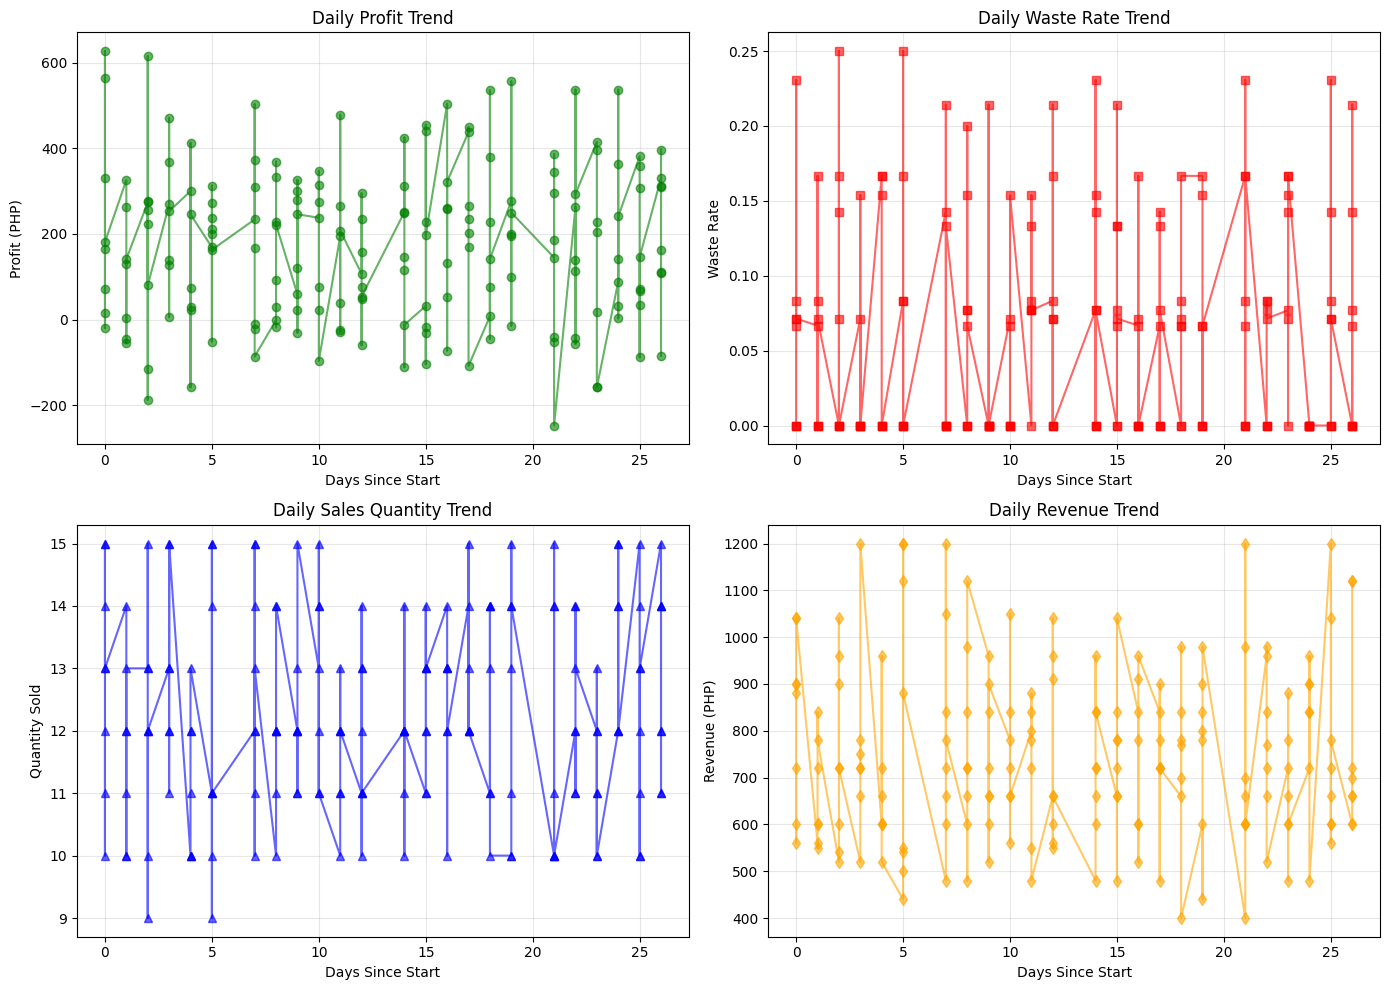

In [28]:
# Create temporal trend analysis from day 1 to last day
data_sorted = data.sort_values('Date').reset_index(drop=True)
data_sorted['Days_Since_Start'] = (data_sorted['Date'] - data_sorted['Date'].min()).dt.days

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Profit Trend
axes[0, 0].plot(data_sorted['Days_Since_Start'], data_sorted['Profit'], marker='o', linestyle='-', alpha=0.6, color='green')
axes[0, 0].set_xlabel('Days Since Start')
axes[0, 0].set_ylabel('Profit (PHP)')
axes[0, 0].set_title('Daily Profit Trend')
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Waste Rate Trend
axes[0, 1].plot(data_sorted['Days_Since_Start'], data_sorted['Waste_Rate'], marker='s', linestyle='-', alpha=0.6, color='red')
axes[0, 1].set_xlabel('Days Since Start')
axes[0, 1].set_ylabel('Waste Rate')
axes[0, 1].set_title('Daily Waste Rate Trend')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Sold Quantity Trend
axes[1, 0].plot(data_sorted['Days_Since_Start'], data_sorted['Sold'], marker='^', linestyle='-', alpha=0.6, color='blue')
axes[1, 0].set_xlabel('Days Since Start')
axes[1, 0].set_ylabel('Quantity Sold')
axes[1, 0].set_title('Daily Sales Quantity Trend')
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Revenue Trend
axes[1, 1].plot(data_sorted['Days_Since_Start'], data_sorted['Revenue'], marker='d', linestyle='-', alpha=0.6, color='orange')
axes[1, 1].set_xlabel('Days Since Start')
axes[1, 1].set_ylabel('Revenue (PHP)')
axes[1, 1].set_title('Daily Revenue Trend')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()